In [28]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
    name=fn, length=len(uploaded[fn])))

Saving Jitendra_Yadav.jpg to Jitendra_Yadav.jpg
User uploaded file "Jitendra_Yadav.jpg" with length 385523 bytes


Text(0.5, 1.0, 'Original Image')

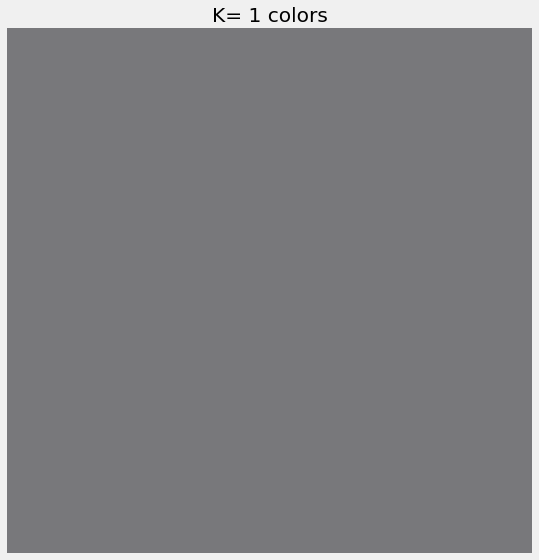

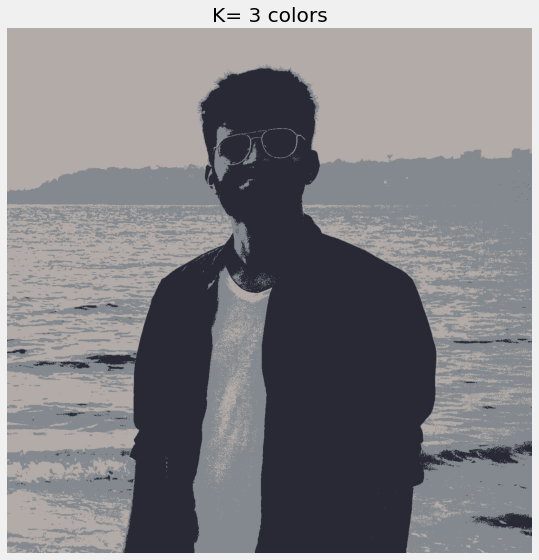

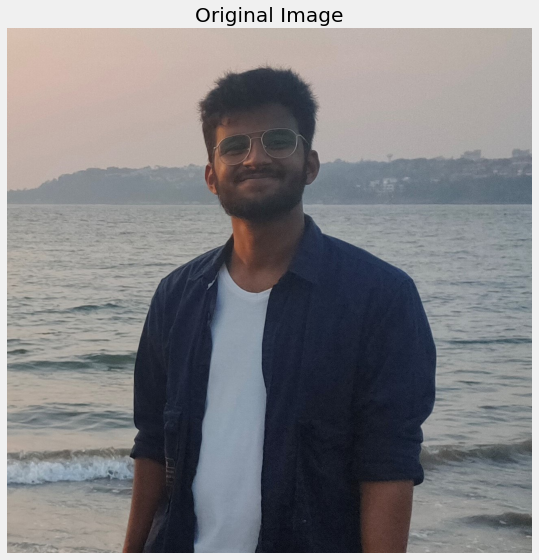

In [62]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.cluster import KMeans

# Read the image
img = imread('Jitendra_Yadav.jpg')
img_size = img.shape

# Reshape it to be 2-dimension
X = img.reshape(img_size[0] * img_size[1], img_size[2])
Ksize = [2,3,10]
# Run the Kmeans algorithm
for i in range(len(Ksize)):
    km = KMeans(n_clusters=Ksize[i])
    km.fit(X)

    # Use the centroids to compress the image
    X_new = km.cluster_centers_[km.labels_]
    X_new = np.clip(X_new.astype('uint8'), 0, 255)

    # Reshape
    X_new = X_new.reshape(img_size[0], img_size[1], img_size[2])

    fig, ax = plt.subplots(figsize = (12, 8))
    ax.imshow(X_new)
    ax.set_title('K= ' +str(Ksize[i]) +' colors')
    for ax in fig.axes:
        ax.axis('off')
    plt.tight_layout();
ax.imshow(img)
ax.set_title('Original Image')